# Measure Worksheet

## 1. Setup
This section load python objects and variables please check the ```cam``` variable

### 1.1 Load python objects
Loads ```scope``` and ```lamp``` python objects for reading sekonic and communication with the lamp

In [15]:
cam = "http://192.168.2.224/video_feed"
whiteTreshold = 150

%run calibration_setup.ipynb

### 1.2 Connect to lamp
Lamp needs to be closed before it can be opened again.
If you dont know the serial port where the lamp is connected use the Find COM port section
1st You need to setup sekonic and feedback camera (the areas where the data will be read, 1st -green value is set up so it would be possibel to get dUV - sign location), then close the lamp and start again with the scope objects

In [16]:
lamp1.close()

In [17]:
lamp1 = apollo_device(ComPort='COM6')
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'782184456C74'

In [18]:
lamp1.color = [200,50,50,500,0]
lamp1.update()

#### [Optional] Find COM port

In [9]:
# Get COM port list
import serial.tools.list_ports

com_ports = list(serial.tools.list_ports.comports())

for port, desc, hwid in com_ports:
    print(str(port)+" "+str(desc))

COM5 USB Serial Port (COM5)
COM6 USB Serial Port (COM6)


### 1.3 Set Sekonic camera areas
Set the area where to "read" the Tcp, dUV and lux variables
Once the object is initalized tune the paramters and test by ```update()```
To save the paramteres use the Setup below to generate the ```saved_string``` and copy and paste it into funtion paramter and save the workbook

In [19]:
Brightness = scope(saved_string="self.slider_h.value = (232, 391)\nself.slider_v.value = (373, 431)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [5]:
Brightness.update()

4130

In [20]:
dUV = scope(saved_string="self.slider_h.value = (250, 443)\nself.slider_v.value = (289, 353)\nself.minus_comp.value = True\nself.offset_x.value = -80\nself.offset_y.value = 2\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [23]:
dUV.update()

-0.029

In [21]:
Kelvin = scope(saved_string="self.slider_h.value = (259, 417)\nself.slider_v.value = (215, 273)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Label(value='Out:')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x87\x00\x00\x002\x08\x02\x00\x00\x00\xf9\x82_\x9…

Output()

In [25]:
Kelvin.update()

5129

#### Setup

In [26]:
Brightness.save_string()

"self.slider_h.value = (229, 388)\nself.slider_v.value = (390, 448)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.')]) \n"

In [27]:
dUV.save_string()

"self.slider_h.value = (250, 443)\nself.slider_v.value = (304, 368)\nself.minus_comp.value = True\nself.offset_x.value = -80\nself.offset_y.value = 2\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('20.0', '0,0'), ('0.6', '0.0'), ('0.8', '0.0')]) \n"

In [28]:
Kelvin.save_string()

"self.slider_h.value = (254, 412)\nself.slider_v.value = (228, 286)\nself.minus_comp.value = False\nself.offset_x.value = 0\nself.offset_y.value = 0\nself.replacement_list.value =str([('o', '0'), ('O', '0'), (',', '.'), ('G', '6')]) \n"

# Measure

In [22]:
lamp1.close()

In [56]:
lamp1 = apollo_device(ComPort='COM6',SekBrightnes=Brightness, SekDuv=dUV, SekKelvin=Kelvin)
lamp1.getId()
lamp1.macId = lamp1.macId.replace(":","")
lamp1.macId

'782184456C74'

In [57]:
%%time

import datetime

wbIndex = 5 # 0-5
wbRanges = [0,14,71,100,178,255]
tempIndex = wbRanges[wbIndex]

import pandas as pd

data = {'sampleNr': [], 'Brightness': [], 'Kelvin': [], 'dUV': [], 'mixedR': [], 'mixedG': [], 'mixedB': [], 'mixedW': [], 'redActual': [], 'lampTemp': [], 'lampTempTarget': [], 'fanSpeed': []}
df = pd.DataFrame(data)

lamp1.color = [1,1,1,tempIndex,0]
lamp1.update(rgbtMode=True)
time.sleep(10)

for i in range(1,255):
    lamp1.color = [i,i,i,tempIndex,0]
    lamp1.update(rgbtMode=True)
    time.sleep(0.3)
    lamp1.read()
    
    timeout = 2
    if i<50:
        timeout = 7
    if i<100:
        timeout = 3
        
    time.sleep(timeout)
    readBrightness = Brightness.update()
    readKelvin = Kelvin.update()
    readDuv = dUV.update()
    
    jsonString = "{"+lamp1.lastValAsJsonString[1:-1]+"}"
    jsonObject = eval(jsonString)
    
    new_line = pd.DataFrame([{
        'sampleNr':i,
        'Kelvin':readKelvin,
        'Brightness':readBrightness,
        'dUV':readDuv,
        'mixedR': jsonObject['mixed_red'],
        'mixedG': jsonObject['mixed_green'],
        'mixedB': jsonObject['mixed_blue'],
        'mixedW': jsonObject['mixed_white'],
        'redActual': jsonObject['red_actual'],
        'lampTemp': jsonObject['lamp_temp'],
        'lampTempTarget': jsonObject['lamp_target'],
        'fanSpeed': jsonObject['fan_speed']}])
    
    df = pd.concat([df, new_line],ignore_index=True)
    
    print('i:'+str(i)+", dUV:"+str(readDuv)+" Kelvin:"+str(readKelvin)+"K Brightness:"+str(readBrightness)+"lx")
    

file_path = "Apollo"+str(lamp1.macId)+"_"+str(wbIndex)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".py"
df.to_csv(file_path, index=False)
print("Saved to: "+file_path)

i:1, dUV:-0.0019 Kelvin:10561K Brightness:147lx
i:2, dUV:-0.0019 Kelvin:10547K Brightness:148lx
i:3, dUV:-0.0019 Kelvin:10530K Brightness:147lx
i:4, dUV:-0.0019 Kelvin:10359K Brightness:151lx
i:5, dUV:-0.0019 Kelvin:10380K Brightness:151lx
i:6, dUV:-0.0019 Kelvin:10058K Brightness:157lx
i:7, dUV:0.0026 Kelvin:9835K Brightness:164lx
i:8, dUV:0.0024 Kelvin:9614K Brightness:171lx
i:9, dUV:0.0024 Kelvin:9618K Brightness:171lx
i:10, dUV:-0.0014 Kelvin:8796K Brightness:181lx
i:11, dUV:-0.0015 Kelvin:8802K Brightness:181lx
i:12, dUV:-0.0015 Kelvin:8662K Brightness:188lx
i:13, dUV:-0.0008 Kelvin:10185K Brightness:196lx
i:14, dUV:-0.0009 Kelvin:9961K Brightness:203lx
i:15, dUV:-0.0008 Kelvin:9965K Brightness:203lx
i:16, dUV:-0.0009 Kelvin:9765K Brightness:210lx
i:17, dUV:-0.0009 Kelvin:9773K Brightness:210lx
i:18, dUV:-0.0009 Kelvin:9588K Brightness:217lx
i:19, dUV:0.0025 Kelvin:9453K Brightness:224lx
i:20, dUV:0.0024 Kelvin:9305K Brightness:231lx
i:21, dUV:0.0024 Kelvin:9306K Brightness:230lx


NameError: name 'datetime' is not defined

In [59]:
import datetime
file_path = "Apollo"+str(lamp1.macId)+"_"+str(wbIndex)+"_"+datetime.datetime.now().strftime("%d%m%Y_%H%M%S")+".csv"
df.to_csv(file_path, index=False)
print("Saved to: "+file_path)

Saved to: Apollo782184456C74_5_14112023_191400.py


In [97]:
lamp1.close()

In [60]:
df

sampleNr  Brightness   Kelvin     dUV  mixedR  mixedG  mixedB  mixedW  \
0         1.0       147.0  10561.0 -0.0019     4.0     4.0     4.0    16.0   
1         2.0       148.0  10547.0 -0.0019     4.0     4.0     4.0    16.0   
2         3.0       147.0  10530.0 -0.0019     4.0     4.0     4.0    16.0   
3         4.0       151.0  10359.0 -0.0019     4.0     4.0     4.0    17.0   
4         5.0       151.0  10380.0 -0.0019     4.0     4.0     4.0    17.0   
..        ...         ...      ...     ...     ...     ...     ...     ...   
249     250.0     18800.0   9897.0 -0.0003   252.0   558.0   353.0  1909.0   
250     251.0     19100.0   9893.0 -0.0002   256.0   566.0   358.0  1937.0   
251     252.0     19400.0   9882.0 -0.0002   260.0   574.0   363.0  1964.0   
252     253.0     19700.0   9892.0 -0.0002   263.0   582.0   368.0  1992.0   
253     254.0     20000.0   9888.0 -0.0001   267.0   590.0   373.0  2020.0   

     redActual  lampTemp  lampTempTarget  fanSpeed  
0          2.0    24.500            65.0       0.0  
1          2.0    24.500            65.0       0.0  
2          2.0    24.500            65.0       0.0  
3          2.0    24.375            65.0       0.0  
4          2.0    24.375            65.0       0.0  
..         ...       ...             ...       ...  
249      172.0    41.750            65.0       0.0  
250      175.0    42.250            65.0       0.0  
251      178.0    42.250            65.0       0.0  
252      182.0    42.875            65.0       0.0  
253      184.0    43.375            65.0       0.0  

[254 rows x 12 columns]

Draw a graph

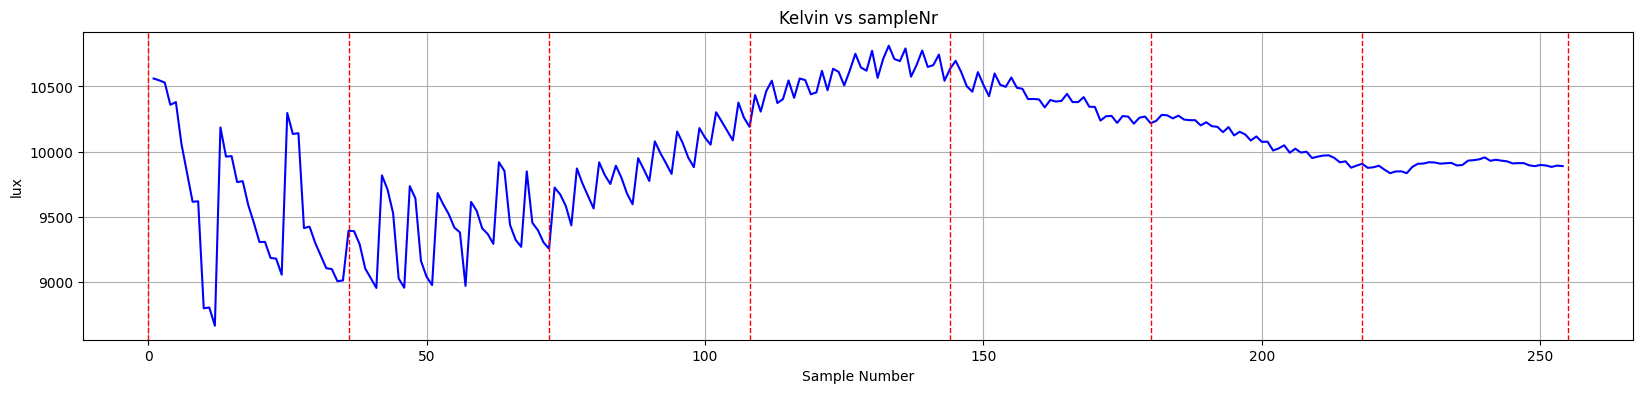

In [87]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = df

# Calibration positions (0 to 255) mapped to their respective sample numbers
calibration_positions = [0, 36, 72, 108, 144, 180, 218, 255]  # Adjusted for 9 points

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
plt.plot(data['sampleNr'], data['Kelvin'], color='b')
plt.title('Kelvin vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('lux')
plt.grid(True)

# Add vertical lines for calibration positions
for position in calibration_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1, label=f'Calibration Position {position}')

# Show the graph
#plt.legend()
kelvinplt = plt



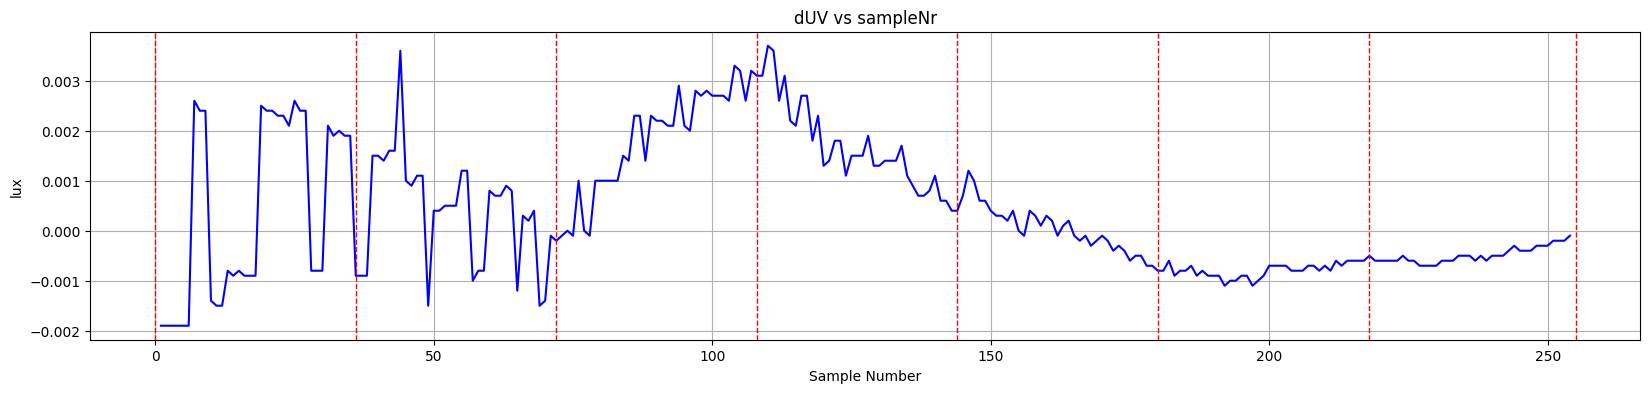

In [88]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = df

# Calibration positions (0 to 255) mapped to their respective sample numbers
calibration_positions = [0, 36, 72, 108, 144, 180, 218, 255]  # Adjusted for 9 points

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
plt.plot(data['sampleNr'], data['dUV'], color='b')
plt.title('dUV vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('lux')
plt.grid(True)

# Add vertical lines for calibration positions
for position in calibration_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1, label=f'Calibration Position {position}')

# Show the graph
#plt.legend()
duvplot = plt



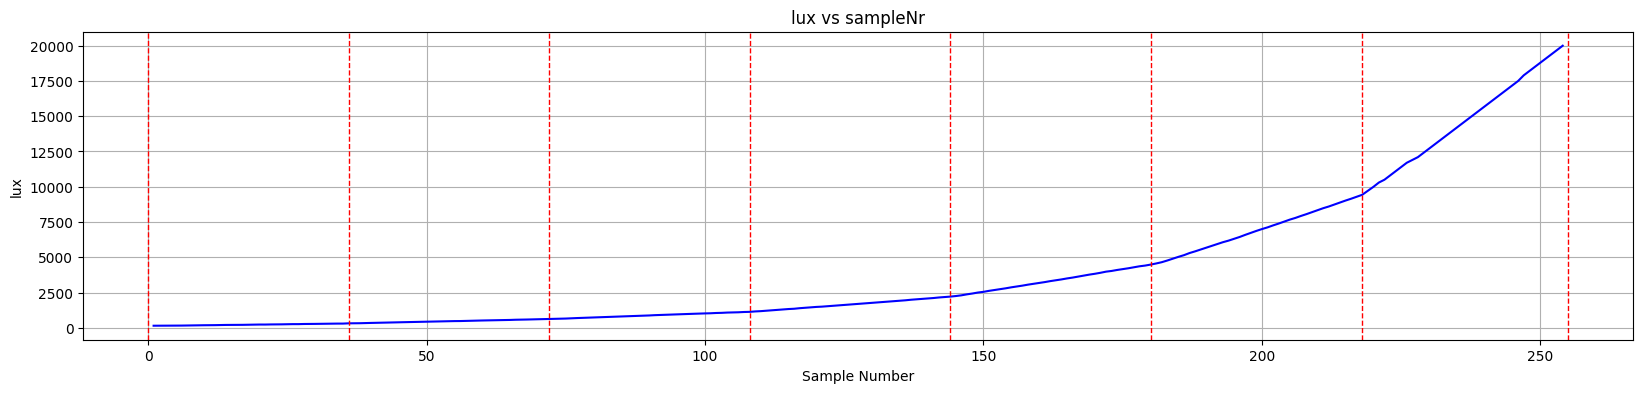

In [89]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = df

# Calibration positions (0 to 255) mapped to their respective sample numbers
calibration_positions = [0, 36, 72, 108, 144, 180, 218, 255]  # Adjusted for 9 points

# Create a plot for dUV against sampleNr
plt.figure(figsize=(20, 4))
plt.plot(data['sampleNr'], data['Brightness'], color='b')
plt.title('lux vs sampleNr')
plt.xlabel('Sample Number')
plt.ylabel('lux')
plt.grid(True)

# Add vertical lines for calibration positions
for position in calibration_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1, label=f'Calibration Position {position}')

# Show the graph
#plt.legend()
luxplot = plt



In [96]:
data.describe()

sampleNr    Brightness        Kelvin         dUV      mixedR  \
count  254.00000    254.000000    254.000000  254.000000  254.000000   
mean   127.50000   4061.248031   9987.259843    0.000428   59.460630   
std     73.46768   5043.121100    465.381253    0.001340   68.239323   
min      1.00000    147.000000   8662.000000   -0.001900    4.000000   
25%     64.25000    548.750000   9767.000000   -0.000700   14.250000   
50%    127.50000   1695.000000   9963.000000    0.000000   25.000000   
75%    190.75000   5777.500000  10355.250000    0.001400   85.500000   
max    254.00000  20000.000000  10813.000000    0.003700  267.000000   

           mixedG      mixedB       mixedW   redActual    lampTemp  \
count  254.000000  254.000000   254.000000  254.000000  254.000000   
mean   128.389764   81.216535   436.688976   38.216535   27.548720   
std    153.163201   96.883025   525.455550   45.848741    4.587508   
min      4.000000    4.000000    16.000000    2.000000   24.250000   
25%     20.000000   12.000000    55.250000    8.000000   24.375000   
50%     56.500000   36.000000   193.500000   15.000000   25.312500   
75%    189.000000  119.500000   646.500000   53.750000   28.843750   
max    590.000000  373.000000  2020.000000  184.000000   43.375000   

       lampTempTarget  fanSpeed  
count           254.0     254.0  
mean             65.0       0.0  
std               0.0       0.0  
min              65.0       0.0  
25%              65.0       0.0  
50%              65.0       0.0  
75%              65.0       0.0  
max              65.0       0.0